In [138]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import math

In [139]:
lowest_part = np.linspace(0, 0.5, 20)
second_lowest_part = np.linspace(.5, .75, 20)
second_highest_part = np.linspace(.75, 1, 20)
highest_part = np.linspace(1, 3, 20)

In [140]:
dbz_lowest_part = 25 + 10 * lowest_part
dbz_second_lowest_part = 60 * second_lowest_part
dbz_second_highest_part = 120 - 100 * second_highest_part
dbz_highest_part = 25 - 5 * highest_part

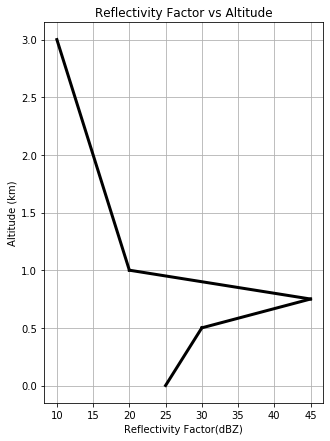

In [141]:
plt.figure(figsize = (5, 7))
plt.plot(dbz_lowest_part, lowest_part, color = 'k', linewidth = 3)
plt.plot(dbz_second_lowest_part, second_lowest_part, color = 'k', linewidth = 3)
plt.plot(dbz_second_highest_part, second_highest_part, color = 'k', linewidth = 3)
plt.plot(dbz_highest_part, highest_part, color = 'k', linewidth = 3)

plt.ylabel('Altitude (km)')
plt.xlabel('Reflectivity Factor(dBZ)')
plt.title('Reflectivity Factor vs Altitude')
plt.grid(True)
plt.show()

In [142]:
lp = pd.DataFrame(dbz_lowest_part)
lp.index = lowest_part

ndlp = pd.DataFrame(dbz_second_lowest_part)
ndlp.index = second_lowest_part

ndhp = pd.DataFrame(dbz_second_highest_part)
ndhp.index = second_highest_part

hp = pd.DataFrame(dbz_highest_part)
hp.index = highest_part


all_reflectivity = pd.concat([lp, ndlp, ndhp, hp])

In [143]:
#Five Legacy Z-R Relationships
#Default
# z = 300 * (r**1.4)

# #Rosenfeld Tropical 
# z = 250 * (r**1.2)

# #Marshall-Palmer 
# z = 200 * (r**1.6)

# #East Cool Season
# z = 130 * (r ** 2.0)

# #West Cool Season 
# z = 75 * (r**2.0)

In [144]:
radius_earth = 6250000
index_of_refraction = 1.25 * (10**-7)
angle = .5
s = np.arange(0, 150000, 1)

#Equation of Height of Radar Beam
h = 1.2 * s**2 * (1/radius_earth + index_of_refraction) + s * math.tan(angle * math.pi/180)

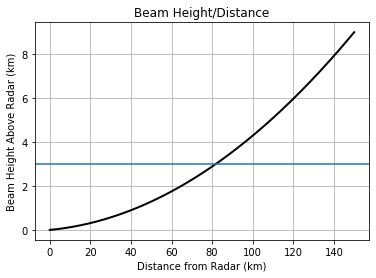

In [145]:
plt.plot(s/1000, h/1000, color = 'k', linewidth = 2)
plt.grid(True)

plt.ylabel('Beam Height Above Radar (km)')
plt.xlabel('Distance from Radar (km)')

plt.title('Beam Height/Distance')

plt.axhline(3)
plt.show()

In [146]:
print('Maximium unambiguous range: 81.765 km')

Maximium unambiguous range: 81.765 km


In [147]:
#Deriving the rain rate 

#z = x* r ** y
def rainfall_rate(x, y, dbz): 
    #np.log10(z) = np.log10(x) + np.log10(r ** y)
    #np.log10(z) - np.log10(x) = y * np.log10(r)
    #(np.log10(z) - np.log10(x))/y = np.log10(r)
    #r = 10 ** ((np.log10(z) / y) - (np.log10(x) / y))
    #np.log10(z) = dbz/10
    
    r = 10 ** (((dbz/10)/y) - (np.log10(x)/y))
    return(r)

In [148]:
heights = all_reflectivity.index.values

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

distance_index = []

for i in range(len(heights)):
    distance_index.append(find_nearest(h/1000, heights[i]))
    
all_reflectivity.columns = ['Reflectivity (dBZ)']
all_reflectivity['Distance from Radar'] = distance_index

In [149]:
#One mm per hour = .0393701 inches per hour
default = rainfall_rate(300, 1.4, all_reflectivity['Reflectivity (dBZ)'].values) * .0393701 * 5
rosenfield_tropical = rainfall_rate(250, 1.2, all_reflectivity['Reflectivity (dBZ)'].values) * .0393701 * 5
marshall_palmer = rainfall_rate(200, 1.6, all_reflectivity['Reflectivity (dBZ)'].values) * .0393701 * 5
east_cool_season = rainfall_rate(130, 2.0, all_reflectivity['Reflectivity (dBZ)'].values) * .0393701 * 5
west_cool_season = rainfall_rate(75, 2.0, all_reflectivity['Reflectivity (dBZ)'].values) * .0393701 * 5

all_reflectivity['Default'] = default
all_reflectivity['Rosenfield Tropical'] = rosenfield_tropical 
all_reflectivity['Marshall-Palmer'] = marshall_palmer
all_reflectivity['East Cool Season'] = east_cool_season
all_reflectivity['West Cool Season'] = west_cool_season

In [150]:
all_reflectivity

,Reflectivity (dBZ),Distance from Radar,Default,Rosenfield Tropical,Marshall-Palmer,East Cool Season,West Cool Season
0.000000,25.000000,0,0.204399,0.239434,0.262116,0.307019,0.404209
0.026316,25.263158,2725,0.213440,0.251835,0.272233,0.316463,0.416643
0.052632,25.526316,5037,0.222881,0.264878,0.282740,0.326198,0.429459
0.078947,25.789474,7081,0.232739,0.278597,0.293653,0.336232,0.442669
0.105263,26.052632,8934,0.243034,0.293026,0.304988,0.346574,0.456286
0.131579,26.315789,10640,0.253784,0.308202,0.316759,0.357235,0.470322
0.157895,26.578947,12231,0.265009,0.324165,0.328986,0.368224,0.484790
0.184211,26.842105,13726,0.276731,0.340954,0.341684,0.379551,0.499702
0.210526,27.105263,15140,0.288971,0.358612,0.354872,0.391226,0.515073
0.236842,27.368421,16487,0.301753,0.377185,0.368569,0.403261,0.530917


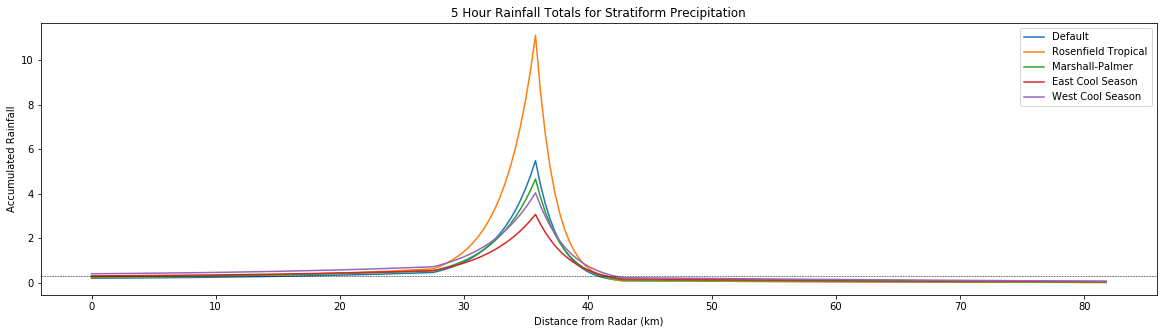

In [173]:
plt.figure(figsize = (20, 5))
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['Default'], label = 'Default')
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['Rosenfield Tropical'], label = 'Rosenfield Tropical')
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['Marshall-Palmer'], label = 'Marshall-Palmer')
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['East Cool Season'], label = 'East Cool Season')
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['West Cool Season'], label = 'West Cool Season')

plt.xlabel('Distance from Radar (km)')
plt.ylabel('Accumulated Rainfall')
plt.title('5 Hour Rainfall Totals for Stratiform Precipitation')
plt.legend()

plt.axhline(.3, color = 'black', linewidth = .5, linestyle = '--')

plt.show()

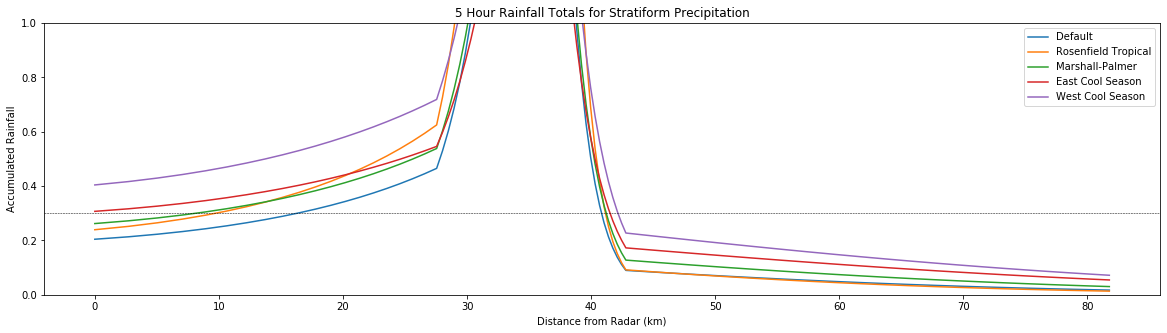

In [164]:
plt.figure(figsize = (20, 5))
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['Default'], label = 'Default')
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['Rosenfield Tropical'], label = 'Rosenfield Tropical')
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['Marshall-Palmer'], label = 'Marshall-Palmer')
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['East Cool Season'], label = 'East Cool Season')
plt.plot(all_reflectivity['Distance from Radar']/1000, all_reflectivity['West Cool Season'], label = 'West Cool Season')

plt.xlabel('Distance from Radar (km)')
plt.ylabel('Accumulated Rainfall')
plt.title('5 Hour Rainfall Totals for Stratiform Precipitation')
plt.legend()

plt.axhline(.3, color = 'black', linewidth = .5, linestyle = '--')
plt.ylim(0, 1)

plt.show()

In [170]:
abs(all_reflectivity  - .3).sum()[2:]

Default                 65.570720
Rosenfield Tropical    121.695298
Marshall-Palmer         60.909034
East Cool Season        45.277294
West Cool Season        62.780946
dtype: float64

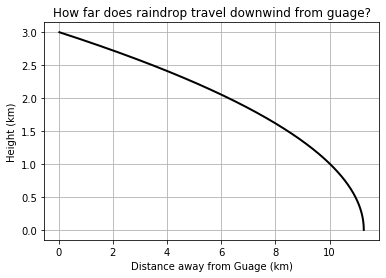

The raindrop traveled 11.265 km downwind of the guage


In [207]:
t = 750 

height = np.arange(0, 3004, 4)[::-1]
v = .01 * height

plt.plot(np.cumsum(v)/1000, height/1000, color = 'k', linewidth = 2)
plt.grid(True)

plt.ylabel('Height (km)')
plt.xlabel('Distance away from Guage (km)')

plt.title('How far does raindrop travel downwind from guage?')
plt.show()

print('The raindrop traveled ' + str(np.sum(v)/1000) + ' km downwind of the guage')

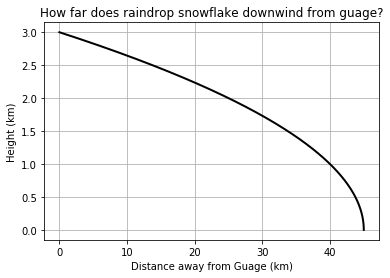

The snowflake traveled 45.015 km downwind of the guage


In [206]:
t = 750 

height = np.arange(0, 3001, 1)[::-1]
v = .01 * height

plt.plot(np.cumsum(v)/1000, height/1000, color = 'k', linewidth = 2)
plt.grid(True)

plt.ylabel('Height (km)')
plt.xlabel('Distance away from Guage (km)')

plt.title('How far does raindrop snowflake downwind from guage?')
plt.show()

print('The snowflake traveled ' + str(np.sum(v)/1000) + ' km downwind of the guage')